# HCP Magnesium

In [1]:
import matplotlib.pyplot as plt
plt.ion()
import numpy as np

import profess
import ase_tools

Define a function that will compute the energy of HCP Magnesium for a given volume and c/a ratio.

In [2]:
def create_hcp_magnesium(vol_per_atom, c_over_a):

    # generate box vectors and ion coordinates
    a = ((2.0*vol_per_atom) / (np.sqrt(3.0)/2.0*c_over_a))**(1.0/3.0)
    box_vectors = np.array([
        [     a,                0.0,        0.0],
        [-0.5*a, np.sqrt(3.0)/2.0*a,        0.0],
        [   0.0,                0.0, c_over_a*a]])
    frac_coords = np.array([
            [    0.0,     0.0, 0.0],
            [2.0/3.0, 1.0/3.0, 0.5]])
    xyz_coords = box_vectors.dot(frac_coords.T).T
    
    # create profess system
    energy_cutoff = 500
    grid_shape = profess.System.get_shape(box_vectors, energy_cutoff, ['a','ev'])
    system = profess.System(grid_shape)  
    system.set_box(box_vectors, 'a')
    system.add_ions('mg.gga.recpot', xyz_coords, 'a')
    system.distribute_electrons_uniformly(system.total_ion_charge())
    (
    system
        .add_hartree_functional()
        .add_ion_electron_functional()
        .add_perdew_burke_ernzerhof_functional() 
        .add_wang_teter_functional()
    )
    
    # minimize energy and return
    system.minimize_energy()
    return system

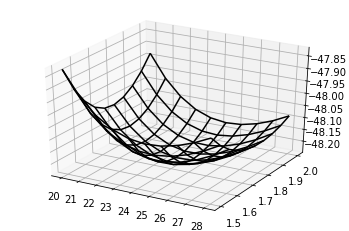

In [3]:


volumes, c_a_ratios = np.meshgrid(np.linspace(20,28,10), np.linspace(1.5,2,10))
energies = np.zeros(volumes.shape)
for i,j in np.ndindex(energies.shape):
    system = create_hcp_magnesium(volumes[i,j], c_a_ratios[i,j])
    energies[i,j] = system.energy('ev')
    
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(volumes, c_a_ratios, energies, rstride=1, cstride=1, color='black')
#ax.plot(np.full(20,equivol[0]), np.full(20,c_over_a), np.linspace(val.min(),val.max(),20), color = 'red', label = 'Murn Optimised Volume')
#ax.plot(np.full(20,equivol[1]), np.full(20,c_over_a), np.linspace(val.min(),val.max(),20), color = 'green', label = 'ASE Optimised Volume')
#ax.legend(loc='best')
#ax.set_xlabel(u'Volume/A\u00B3')
#ax.set_ylabel('c/a ratio')
#ax.set_zlabel('Energy/eV')
plt.show()


In [4]:
system = create_hcp_magnesium(20, 1.6)
ase_tools.minimize_forces_stress(system, 'BFGSLineSearch', 1e-4)
print(system.volume('a3'))

                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 15:01:46       -1.763136        0.1454
BFGSLineSearch:    1[  2] 15:01:48       -1.771840        0.0469
BFGSLineSearch:    2[  3] 15:01:50       -1.772978        0.0130
BFGSLineSearch:    3[  4] 15:01:51       -1.773086        0.0115
BFGSLineSearch:    4[  6] 15:01:53       -1.773191        0.0109
BFGSLineSearch:    5[  8] 15:01:54       -1.773486        0.0078
BFGSLineSearch:    6[ 10] 15:01:56       -1.773527        0.0143
BFGSLineSearch:    7[ 12] 15:01:58       -1.773739        0.0077
BFGSLineSearch:    8[ 15] 15:02:00       -1.776324        0.0353
BFGSLineSearch:    9[ 16] 15:02:01       -1.777783        0.0252
BFGSLineSearch:   10[ 17] 15:02:02       -1.778150        0.0132
BFGSLineSearch:   11[ 18] 15:02:03       -1.778190        0.0099
BFGSLineSearch:   12[ 20] 15:02:04       -1.778241        0.0098
BFGSLineSearch:   13[ 22] 15:02:06       -1.778362        0.0073
BFGSLineSearch:   14[ 23]

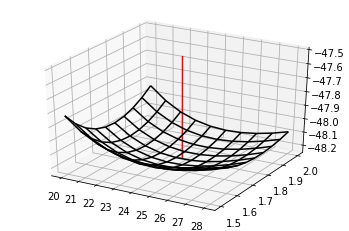

In [5]:
def energy(args):
    vol_per_atom = args[0]
    c_over_a = args[1]
    system = create_hcp_magnesium(vol_per_atom, c_over_a)
    return system.energy('ev')

from scipy.optimize import minimize

result = minimize(energy, (20, 1.6), method='Nelder-Mead')
vol, c_a = result.x

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(volumes, c_a_ratios, energies, rstride=1, cstride=1, color='black')
#ax.plot(np.full(20,equivol[0]), np.full(20,c_over_a), np.linspace(val.min(),val.max(),20), color = 'red', label = 'Murn Optimised Volume')
#ax.plot(np.full(20,equivol[1]), np.full(20,c_over_a), np.linspace(val.min(),val.max(),20), color = 'green', label = 'ASE Optimised Volume')
#ax.legend(loc='best')
#ax.set_xlabel(u'Volume/A\u00B3')
#ax.set_ylabel('c/a ratio')
#ax.set_zlabel('Energy/eV')

ax.plot(np.full(20,vol), np.full(20,c_a), np.linspace(np.min(energies),-47.5,20), color = 'red', label = 'Murn Optimised Volume')
plt.show()
